In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt # .pyplot is one module in matplotlib
# matplotlib is from MATLAB

In [2]:
'''
The latest version of matplotlib gives errors for networkx because networkx has not been updated.
The errors arise from the depriciated functions used in your-python-dir/site-packages/networkx/drawing/nx_pylab.py
In this file, make the following changes:

Replace all instances of cb.is_string_like with isinstance:

Lines 511, 514, 520, 532, 712, 848 - isinstance(var, str)
where var is the name of the variable in that line.

Replace cb.is_number with isinstance:

Line 544 - isinstance(alpha, float)

Replace all instances of cb.iterable with numpy.iterable
'''

'\nThe latest version of matplotlib gives errors for networkx because networkx has not been updated.\nThe errors arise from the depriciated functions used in your-python-dir/site-packages/networkx/drawing/nx_pylab.py\nIn this file, make the following changes:\n\nReplace all instances of cb.is_string_like with isinstance:\n\nLines 511, 514, 520, 532, 712, 848 - isinstance(var, str)\nwhere var is the name of the variable in that line.\n\nReplace cb.is_number with isinstance:\n\nLine 544 - isinstance(alpha, float)\n\nReplace all instances of cb.iterable with numpy.iterable\n'

In [3]:
G = nx.Graph() # creates an empty graph
type(G)

networkx.classes.graph.Graph

In [4]:
G.add_edges_from([('a', 'b', {'weight': 2, 'label': 2}),
('a', 'c', {'weight': 3, 'label': 3}),
('a', 'd', {'weight': 1, 'label': 1}),
('a', 'e', {'weight': 3, 'label': 3}),
('b', 'c', {'weight': 4, 'label': 4}),
('c', 'd', {'weight': 5, 'label': 5}),
('d', 'e', {'weight': 4, 'label': 4}),
('e', 'a', {'weight': 1, 'label': 1})]) # adding 2 properties to the edge - weight and label but can add more properties

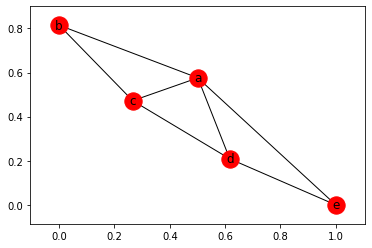

In [5]:
nx.draw_networkx(G)

In [6]:
[x for x in nx.__dir__() if x.endswith("_layout")]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout',
 'graphviz_layout',
 'pygraphviz_layout']

In [7]:
pos = nx.circular_layout(G)

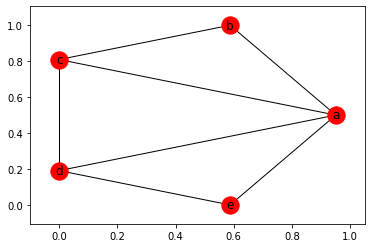

In [8]:
nx.draw_networkx(G, pos=pos)

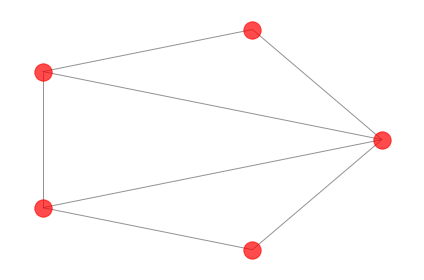

In [9]:
nx.draw_networkx(G, pos, alpha = 0.7, with_labels= False, edge_color = '.4')
# alpha = intensity of the plot - opaque to transparent
plt.axis('off')
plt.tight_layout()

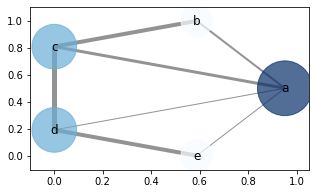

In [9]:
plt.figure(figsize=(5,3))
node_color = [G.degree(v) for v in G]
node_size = [1000*i[1] for i in nx.triangles(G).items()]
edge_width = [G[u][v]['weight'] for u, v, in G.edges()]
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, alpha = 0.7, width = edge_width, edge_color = '.4', cmap=plt.cm.Blues)

In [10]:
for cc in nx.connected_components(G):
    print(cc)

['a', 'b', 'c', 'd', 'e']


In [11]:
G2 = nx.DiGraph()

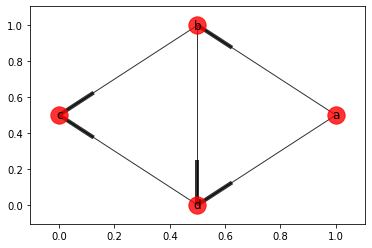

In [12]:
G2.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('a', 'd')])
#pos = nx.spring_layout(G2, k=0.4)
pos = nx.circular_layout(G2)
nx.draw_networkx(G2, pos, alpha = 0.8)

In [13]:
for cc in nx.strongly_connected_components(G2):
  print(cc)

['c']
['d']
['b']
['a']


In [14]:
if nx.is_directed_acyclic_graph(G2):
  print("Topological ordering of the nodes: ", list(nx.topological_sort(G2)))
else:
  print("G contains a cycle, hence no sorting")

Topological ordering of the nodes:  ['a', 'b', 'd', 'c']


In [15]:
if nx.is_eulerian(G2):
  cycle = nx.eulerian_circuit(G2)
  print("There is an Eulerian cycle in the graph.")
else:
  print("There is no Eulerian cycle in the graph.")

There is no Eulerian cycle in the graph.
